In [1]:
import torch
import torch.nn as nn
import os
import time
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
colnames = ['ID','diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension','radius se','texture se','perimeter se','area se','smoothness se','compactness se','concavity se','concave points se','symmetry se','fractal dimension se',' worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']
df = pd.read_csv("/Users/ruthwetters/Documents/Neural Computing/wdbc.data",names=colnames)
df

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df = df.replace({"diagnosis":  {"M":1,"B":0}})

In [4]:
from sklearn.model_selection import train_test_split
X = torch.from_numpy(df.drop('diagnosis', axis=1).to_numpy()).float()
y = df['diagnosis'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [5]:
y_train = torch.tensor(y_train)

In [6]:
y_test = torch.tensor(y_test)

In [84]:
import torch
from torch import nn
import torch.nn.functional as F
device = 'cpu'
mnist_dim = 31
hidden_dim = 568
output_dim = 2

In [85]:
from torch.distributions import Normal

In [86]:
class ClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim=mnist_dim,
            hidden_dim=hidden_dim,
            output_dim=output_dim,
            dropout=0.5,
    ):
        super(ClassifierModule, self).__init__()
        self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, X, **kwargs):
        X = F.tanh(self.hidden(X))
        X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [87]:
from skorch import NeuralNetClassifier
torch.manual_seed(0)

net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=30,
    lr=0.001,device=device
)

In [88]:
model = net.fit(X_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8195       0.6250        0.7072  0.0238
      2        0.7731       0.6250        0.6753  0.0265
      3        0.7237       0.6250        0.6715  0.0321
      4        0.7095       0.6250        0.6644  0.0372
      5        0.7510       0.6250        0.6650  0.0354


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.7016       0.6250        0.6660  0.0703
      7        0.7337       0.6250        0.6679  0.0622
      8        0.7341       0.6250        0.6644  0.0479
      9        0.7396       0.6250        0.6646  0.0377
     10        0.7505       0.6250        0.6668  0.0444
     11        0.7151       0.6250        0.6678  0.0404
     12        0.7201       0.6250        0.6660  0.0405
     13        0.7068       0.6250        0.6660  0.0388
     14        0.7376       0.6250        0.6652  0.0368
     15        0.7603       0.6250        0.6659  0.0507
     16        0.7130       0.6250        0.6649  0.0502
     17        0.7333       0.6250        0.6640  0.0493
     18        0.7401       0.6250        0.6642  0.0436
     19        0.7023       0.6250        0.6646  0.0372
     20        0.7340       0.6250        0.6662  0.0466
     21        0.7031       0.6250        0.6651  0.0317
     22        0.7184       0.6250        0.6691  0.0421
     23        0.7448       0.6

In [45]:
y_pred = net.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#investigating the effect of early stopping
from skorch.callbacks import EarlyStopping
net = NeuralNetClassifier(
    ClassifierModule,
    lr=0.001,
    max_epochs=100,
    callbacks=[EarlyStopping()],
)

In [47]:
net.fit(X_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7862       0.6125        0.6644  0.0956
      2        0.7482       0.6250        0.6656  0.0373
      3        0.7558       0.6250        0.6684  0.0303


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      4        0.7104       0.6250        0.6674  0.0296
      5        0.7256       0.6250        0.6668  0.0523
      6        0.7564       0.6250        0.6629  0.0512
      7        0.7018       0.6250        0.6665  0.0507
      8        0.6681       0.6250        0.6670  0.0409
      9        0.7258       0.6250        0.6663  0.0419
     10        0.7407       0.6250        0.6666  0.0400
Stopping since valid_loss has not improved in the last 5 epochs.


In [48]:
from sklearn.model_selection import cross_validate
scores = cross_validate(net, X_train, y_train, scoring='accuracy', cv=5)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.9130       0.3750        0.7324  0.0257
      2        0.7669       0.6250        0.6769  0.0367
      3        0.8070       0.6250        0.6634  0.0311
      4        0.7119       0.6250        0.6618  0.0355
      5        0.6840       0.6250        0.6618  0.0409


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.6612       0.6250        0.6618  0.0390
      7        0.6799       0.6250        0.6621  0.0261
      8        0.7675       0.6250        0.6628  0.0652
      9        0.7005       0.6250        0.6625  0.0560
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7912       0.6250        0.6659  0.0212
      2        0.7499       0.6250        0.6632  0.0299
      3        0.7122       0.6250        0.6630  0.0408
      4        0.7135       0.6250        0.6637  0.0354
      5        0.6979       0.6250        0.6648  0.0456


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      6        0.7604       0.6250        0.6646  0.0345
      7        0.7650       0.6250        0.6649  0.0451
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7158       0.6250        0.6633  0.0366
      2        0.7219       0.6250        0.6641  0.0386
      3        0.7323       0.6250        0.6652  0.0395
      4        0.7290       0.6250        0.6645  0.0349
      5        0.7423       0.6250        0.6649  0.0315


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8820       0.3750        0.7275  0.0681
      2        0.7844       0.6250        0.6762  0.0291
      3        0.7003       0.6250        0.6637  0.0340
      4        0.7618       0.6250        0.6616  0.0295


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.7305       0.6250        0.6618  0.0811
      6        0.7580       0.6250        0.6620  0.0311
      7        0.7914       0.6250        0.6631  0.0297
      8        0.7289       0.6250        0.6627  0.0387
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7185       0.6250        0.6648  0.0191
      2        0.7652       0.6250        0.6635  0.0250
      3        0.7451       0.6250        0.6628  0.0272
      4        0.7626       0.6250        0.6616  0.0325
      5        0.7309       0.6250        0.6632  0.0275
      6        0.7081       0.6250        0.6630  0.0376


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      7        0.7260       0.6250        0.6626  0.0345
      8        0.7560       0.6250        0.6626  0.0281
Stopping since valid_loss has not improved in the last 5 epochs.


In [49]:
#investigating the effect of weight decay
net = NeuralNetClassifier(
    ClassifierModule,
    lr=0.001,
    max_epochs=100,
    callbacks=[EarlyStopping()],
    optimizer__weight_decay=0.01,
)

In [50]:
net.fit(X_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7842       0.6250        0.6699  0.0712
      2        0.7642       0.6250        0.6635  0.0382
      3        0.7402       0.6250        0.6648  0.0487
      4        0.7134       0.6250        0.6666  0.0411


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      5        0.7119       0.6250        0.6660  0.0611
      6        0.7554       0.6250        0.6662  0.0458
Stopping since valid_loss has not improved in the last 5 epochs.


In [66]:
#investigating the effect of momentum
net = NeuralNetClassifier(
    ClassifierModule,
    lr=0.001,
    max_epochs=100,
    callbacks=[EarlyStopping()],
    optimizer__weight_decay=0.01,
    optimizer__momentum=0.05,
)

In [67]:
net.fit(X_train, y_train)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.8322       0.6250        0.6684  0.0608
      2        0.7340       0.6250        0.6643  0.0317
      3        0.7306       0.6250        0.6658  0.0530


/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


      4        0.7110       0.6250        0.6656  0.0463
      5        0.7110       0.6250        0.6648  0.0674
      6        0.7470       0.6250        0.6679  0.0401
Stopping since valid_loss has not improved in the last 5 epochs.


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ClassifierModule(
    (dropout): Dropout(p=0.5, inplace=False)
    (hidden): Linear(in_features=31, out_features=568, bias=True)
    (output): Linear(in_features=568, out_features=2, bias=True)
  ),
)

In [61]:
scores

{'fit_time': array([0.45988774, 0.33793783, 0.27283597, 0.46067595, 0.31627488]),
 'score_time': array([0.00817513, 0.00849891, 0.01263809, 0.00759697, 0.01494598]),
 'test_score': array([0.625     , 0.625     , 0.625     , 0.63291139, 0.63291139])}

In [63]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','sigmoid','linear'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.01, 0.05, 0.5],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'sigmoid', 'linear'],
                         'alpha': [0.0001, 0.01, 0.05, 0.5],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [64]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.628 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.628 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.628 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.628 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.628 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.628 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': '

In [65]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
import pickle
filename = 'finalized_mlp.sav'
pickle.dump(model, open(filename, 'wb'))

/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


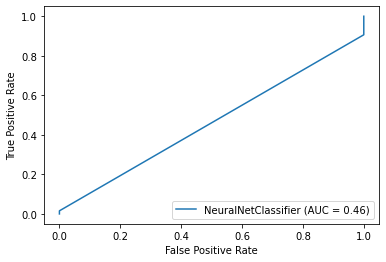

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)
plt.show()